In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Loading the dataset

file=pd.read_csv('C:/Users/Bhavya N/ML_Fall19/Assignment_1/BSOM_DataSet_reorganized.csv')


df=file[['all_NBME_avg_n4', 'all_PIs_avg_n131', 'HD_final']]


print(df.head())

   all_NBME_avg_n4  all_PIs_avg_n131  HD_final
0           0.7700            0.7617      0.95
1           0.8000            0.7433      0.84
2           0.8125            0.8150      0.88
3           0.9250            0.8867      0.91
4           0.8550            0.8317      0.83


In [3]:
# Cleaning the dataset

df.isnull().any()

#There are no null values so the data is proper 

all_NBME_avg_n4     False
all_PIs_avg_n131    False
HD_final            False
dtype: bool

1. a KMeans Clustering 

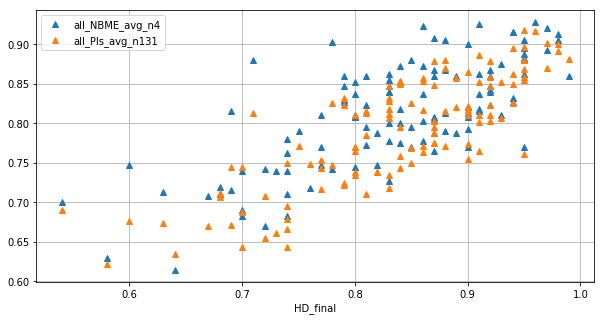

In [4]:
# Initially the data is like this 

df.set_index('HD_final').plot(linestyle="none",figsize=(10,5), grid=True,marker="^")




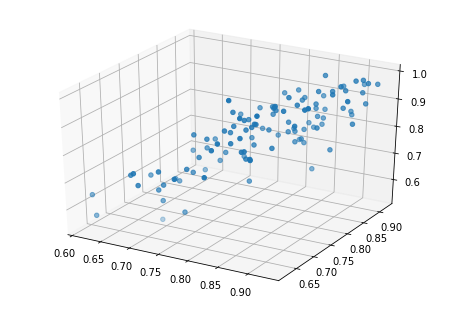

In [5]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])


In [6]:


import numpy as np
single_point = [3, 4]
points = np.arange(20).reshape((10,2))

dist = (points - single_point)**2
dist = np.sum(dist, axis=1)
dist = np.sqrt(dist)

print(dist)

[ 4.24264069  1.41421356  1.41421356  4.24264069  7.07106781  9.89949494
 12.72792206 15.55634919 18.38477631 21.21320344]


The centroids are :     all_NBME_avg_n4  all_PIs_avg_n131  HD_final
25           0.8475            0.8317      0.79
72           0.9025            0.8250      0.78
91           0.8375            0.7700      0.80
<class 'pandas.core.frame.DataFrame'>


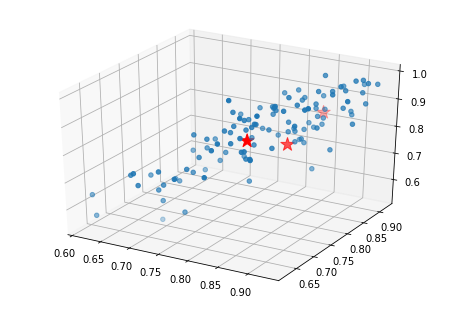

In [7]:
# initializing the centroids

clusters = df.sample(n=3)
print('The centroids are :',clusters)

print(type(clusters))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2])
ax.scatter(np.array(clusters.iloc[0,:]),np.array(clusters.iloc[1,:]),np.array(clusters.iloc[2,:]), marker='*', s=200, c='r')

In [8]:
total = df.shape

print(total)

(115, 3)


In [9]:


def euclidiean(featureset ,centroids ):
    
    calculated_clusters=np.linalg.norm(centroids-featureset, axis=1)
    
    classified_clusters=np.linalg.norm(centroids-featureset, axis=1).argmin()
    return calculated_clusters,classified_clusters


categories=np.apply_along_axis(euclidiean, 1, df , clusters) 





print(categories)
"""
#print('categories',categories)

df_categories=pd.DataFrame(categories)

print(df_categories)
"""

[[array([0.19106609, 0.22464002, 0.16469712]) 2]
 [array([0.11211962, 0.14415665, 0.06098475]) 2]
 [array([0.09799944, 0.13490738, 0.09513149]) 2]
 [array([0.1530727 , 0.14564731, 0.18268864]) 1]
 [array([0.04069705, 0.06929026, 0.07080353]) 0]
 [array([0.11464646, 0.15590106, 0.07512084]) 2]
 [array([0.23055639, 0.25837403, 0.19175281]) 2]
 [array([0.14494099, 0.17720045, 0.11067972]) 2]
 [array([0.18095066, 0.21191095, 0.13686216]) 2]
 [array([0.14484906, 0.15359408, 0.14018966]) 2]
 [array([0.05347794, 0.0820061 , 0.09069179]) 0]
 [array([0.10114252, 0.12834773, 0.04196594]) 2]
 [array([0.16656197, 0.17327723, 0.17951323]) 0]
 [array([0.09222933, 0.12805132, 0.06898652]) 2]
 [array([0.16731948, 0.17686475, 0.18430719]) 0]
 [array([0.13913864, 0.17178443, 0.08469292]) 2]
 [array([0.07305573, 0.11855906, 0.04616546]) 2]
 [array([0.04083883, 0.08010705, 0.06561357]) 0]
 [array([0.16484277, 0.19800568, 0.14188464]) 2]
 [array([0.12409674, 0.14720017, 0.11447659]) 2]
 [array([0.1255822 ,

"\n#print('categories',categories)\n\ndf_categories=pd.DataFrame(categories)\n\nprint(df_categories)\n"

In [10]:
df_categories=pd.DataFrame(categories)

df_categories.columns = ['clustersDistance', 'grouping']



print(df_categories['clustersDistance'].mean())


[0.13736092 0.16174461 0.12778993]


In [24]:
print(df.shape[0])
centroid=np.array(clusters)

print(centroid)
c_old=np.zeros(clusters.shape)

print(c_old.shape)


print(type(error))
mean=np.zeros(centroid.shape)
iterator=0
total=df.shape





115
[[0.8475 0.8317 0.79  ]
 [0.9025 0.825  0.78  ]
 [0.8375 0.77   0.8   ]]
(3, 3)
(array([1.42621217, 1.45035556, 1.39079339]), 2)
<class 'tuple'>
[1.42621217 1.45035556 1.39079339]


In [25]:
#step2:
while error!=0:
    #step 3:
    dist=np.apply_along_axis(euclidiean, 1, df , clusters)
    distances=pd.DataFrame(distances)
    #distances[i]=euclidiean(x[i],centroid[0]) 
    belongs_to=distances.iloc[:,1]

    #step 4:taking mean and repeat

    c_old=deepcopy(centroid)
    print('c_old',c_old)
    
    df_categories=pd.DataFrame(categories)

    df_categories.columns = ['clustersDistance', 'grouping']

    print(df_categories['clustersDistance'].mean())
    centroid[0]=mean[0]
    centroid[1]=mean[1]

    e1=euclidiean(centroid,c_old)
    print(error)
    e2=np.asarray(e1)
    error=e2[0]
    print('error is :',error)

    iterator+=1
    if error<1:
        print("same centroids again")


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
C:\Users\Bhavya N\ML_Fall19\Assignment_1